Data Preparation
1.1 Load and Preprocess Satellite Image

In [ ]:
!pip install rasterio

NDVI MODEL

In [ ]:
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Function to calculate NDVI from satellite images

In [ ]:
def calculate_ndvi(nir_band_path, red_band_path, epsilon=1e-10):
    with rasterio.open(nir_band_path) as nir_src:
        nir_band = nir_src.read(1)

    with rasterio.open(red_band_path) as red_src:
        red_band = red_src.read(1)

    # Avoid division by zero
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)
    return ndvi

# Function to preprocess and load NDVI data

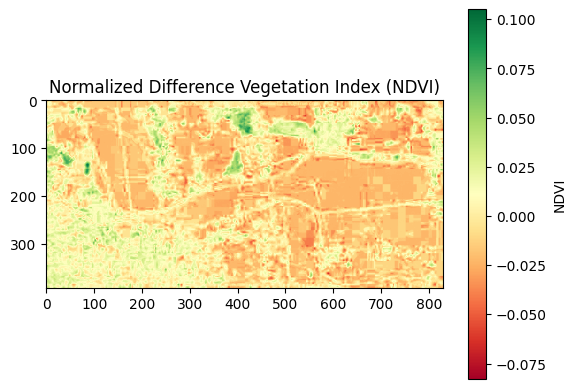

In [ ]:
import rasterio
import pickle
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/SIH/Sentinel2 image .jpg'

Latitude = 23.789994
Longitude = 92.246844

with rasterio.open(image_path) as src:
    # Read the image bands (assuming NIR and Red bands are available, adjust if needed)
    nir_band = src.read(2).astype(float)  # band 2
    red_band = src.read(3).astype(float)  # band 3

    # Avoid division by zero by setting a small value for zero NIR reflectance
    epsilon = 1e-9
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)

# Plot the NDVI image
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()



In [ ]:
from matplotlib.colors import ListedColormap

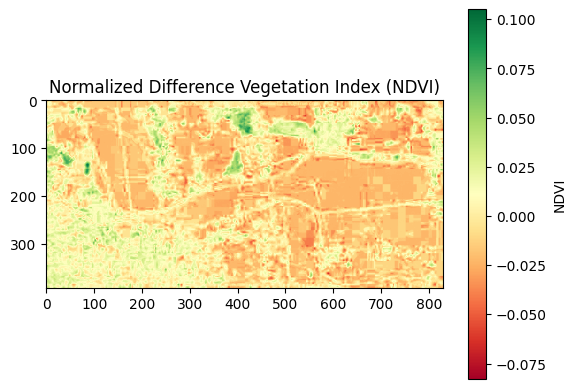

In [ ]:
import rasterio
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

image_path = '/content/drive/MyDrive/SIH/Sentinel2 image .jpg'

Latitude = 23.789994
Longitude = 92.246844

with rasterio.open(image_path) as src:
    # Read the image bands (assuming NIR and Red bands are available, adjust if needed)
    nir_band = src.read(2).astype(float)  # band 2
    red_band = src.read(3).astype(float)  # band 3

    # Avoid division by zero by setting a small value for zero NIR reflectance
    epsilon = 1e-9
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)

# Plot the NDVI image
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()




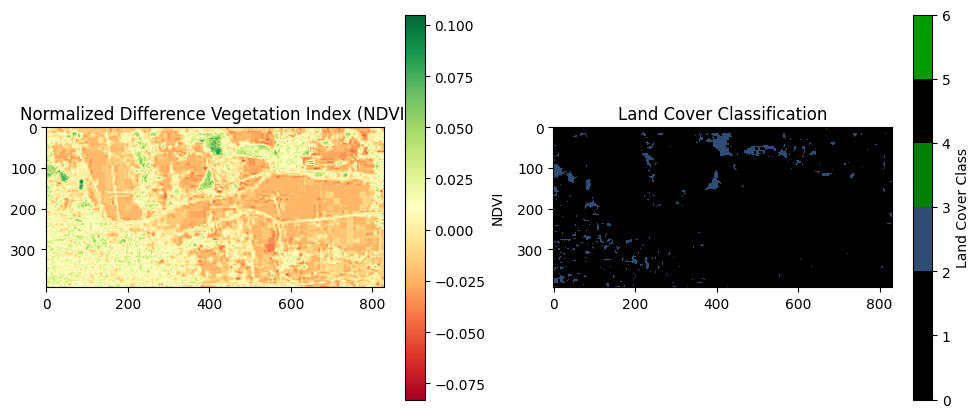

In [ ]:
ndvi_ranges = [
    -0.28, 0.015,   # Water
    0.015, 0.14,    # Built-up
    0.14, 0.18,     # Barren Land
    0.18, 0.27,     # Shrub and Grassland
    0.27, 0.36,     # Sparse Vegetation
    0.36, 0.74      # Dense Vegetation
]

# Define colors for each class
colors = [
    (0, 0, 255),   # Blue for Water
    (255, 0, 0),   # Red for Built-up
    (210, 180, 140),  # Tan for Barren Land
    (0, 128, 0),   # Green for Shrub and Grassland
    (255, 255, 0),  # Yellow for Sparse Vegetation
    (0, 100, 0)    # Dark Green for Dense Vegetation
]

# Function to classify NDVI values into land cover classes
def classify_ndvi(ndvi_value):
    if ndvi_value is None:
        return 0  # Return class 0 for undefined/unclassified pixels

    for i, (lower, upper) in enumerate(zip(ndvi_ranges[::2], ndvi_ranges[1::2])):
        if lower <= ndvi_value <= upper:
            return i + 1  # Return the index of the land cover class (starting from 1)

    return 0  # Default to class 0 if no range matches

# Apply the classification function to each pixel in the NDVI array
rows, cols = ndvi.shape
classified_image = np.zeros_like(ndvi, dtype=int)

for i in range(rows):
    for j in range(cols):
        classified_image[i, j] = classify_ndvi(ndvi[i, j])

# Create a colormap using ListedColormap
cmap = ListedColormap(colors, name='custom_colormap', N=len(colors))

# Plot the original NDVI image and the classified image with specified colors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')

plt.subplot(1, 2, 2)
plt.imshow(classified_image, cmap=cmap, vmin=0, vmax=len(ndvi_ranges)//2)
plt.colorbar(ticks=np.arange(0, len(ndvi_ranges)//2 + 1), label='Land Cover Class')
plt.title('Land Cover Classification')

plt.show()

Training NDVI

<ipython-input-24-1b738d2e4b3f>:18: RuntimeWarning: divide by zero encountered in divide
  simple_vi = (red_channel.astype(float) - blue_channel.astype(float)) / (red_channel + blue_channel)
<ipython-input-24-1b738d2e4b3f>:18: RuntimeWarning: invalid value encountered in divide
  simple_vi = (red_channel.astype(float) - blue_channel.astype(float)) / (red_channel + blue_channel)


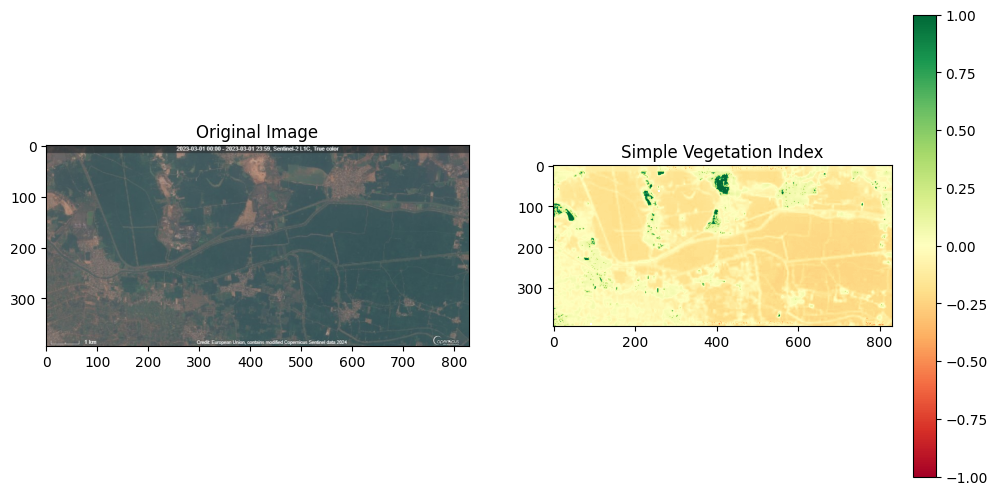

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image_path = '/content/drive/MyDrive/SIH/Sentinel2 image .jpg'
image = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract the Red and Blue channels
red_channel = image_rgb[:, :, 0]
blue_channel = image_rgb[:, :, 2]

# Calculate a simple vegetation index using Red and Blue channels
# This is not true NDVI but a rough approximation
simple_vi = (red_channel.astype(float) - blue_channel.astype(float)) / (red_channel + blue_channel)

# Clip the values to the range [-1, 1]
simple_vi = np.clip(simple_vi, -1, 1)

# Display the original image and the vegetation index
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('Simple Vegetation Index')
plt.imshow(simple_vi, cmap='RdYlGn')
plt.colorbar()

plt.show()


In [ ]:
def estimate_vegetation_height(ndvi_value):
    # Define a linear relationship (this needs to be calibrated based on ground truth data)
    # Example: height = m * NDVI + b
    m = 3  # Slope
    b = 1  # Intercept

    # Apply the relationship to estimate height (in meters)
    height = m * ndvi_value + b

    if height > 2:
        print(f"Cutting needed for Latitude and Longitude: {Latitude}, {Longitude}")


    return height

estimated_height = estimate_vegetation_height(average_ndvi_vegetation)
print("Estimated vegetation height:", estimated_height, "meters")

Estimated vegetation height: nan meters


Step 2: Build and Train the GAN Model
2.1 Define GAN Architecture
Define the generator and discriminator for the GAN.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=100))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(np.prod(image.shape), activation='tanh'))
    model.add(layers.Reshape(image.shape))
    return model

def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=image.shape))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


2.2 Compile GAN


In [ ]:
import rasterio
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_dim=100))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(np.prod((64, 64, 3)), activation='tanh'))
    model.add(layers.Reshape((64, 64, 3)))
    return model


In [ ]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(64, 64, 3)))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

Compile gan

In [ ]:
def compile_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    discriminator.trainable = False

    gan_input = layers.Input(shape=(100,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)

    gan = tf.keras.models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

In [ ]:
import rasterio
import cv2
import numpy as np
import tensorflow as tf
# Added import statement for tensorflow
from tensorflow.keras import layers
import matplotlib.pyplot as plt# Instantiate and compile the GAN
generator = build_generator()
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)

# Preprocess the image
def preprocess_image(image_path, size=(64, 64)):
    with rasterio.open(image_path) as src:
        image = src.read([1, 2, 3])  # Read the bands (adjust if needed)
        image = np.moveaxis(image, 0, -1)  # Convert from (bands, height, width) to (height, width, bands)
        image = cv2.resize(image, size)
        image = image / 255.0  # Normalize to [0, 1]
    return image

train gan

In [ ]:
def train_gan(gan, generator, discriminator, epochs, batch_size, save_interval, image_paths):
    # Load and preprocess data
    X_train = np.array([preprocess_image(path) for path in image_paths])

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, valid)

        # Save the model and generated images at intervals
        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
            save_generated_images(generator, epoch)

def save_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, :])
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List of satellite image paths
image_paths = ['/content/drive/MyDrive/SIH/Sentinel2 image .jpg']

# Train the GAN
train_gan(gan, generator, discriminator, epochs=1000, batch_size=32, save_interval=100, image_paths=image_paths)


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


1/1 [==============================] - 0s 388ms/step
0 [D loss: 0.6770986616611481 | D accuracy: 53.125] [G loss: 0.7516965866088867]
1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 40ms/step
100 [D loss: 0.13981247693300247 | D accuracy: 98.4375] [G loss: 6.4438371658325195]
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 68ms/step
200 [D loss: 0.01964526902884245 | D accuracy: 100.0] [G loss: 15.148162841796875]
1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 73ms/step
300 [D loss: 0.34172768518328667 | D accuracy: 98.4375] [G loss: 13.64155101776123]
1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 48ms/step
400 [D loss: 0.903832882642746 | D accuracy: 40.625] [G loss: 2.858541965484619]
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 40ms/step
500 [D loss: 0.25927280939231423 | D accuracy: 100.0] [G loss: 20.09423065185547]
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 41ms/step
600 [D loss: 0.059160295873880386 | D accuracy: 100.0] [G loss: 5.701752662658691]
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 47ms/step
700 [D loss: 0.15391418047511252 | D accuracy: 100.0] [G loss: 13.653711318969727]
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 44ms/step
800 [D loss: 0.035101539455354214 | D accuracy: 98.4375] [G loss: 7.820110321044922]
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 73ms/step
900 [D loss: 0.11030633002519608 | D accuracy: 96.875] [G loss: 12.337121963500977]
1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 44ms/step


Generate Synthetic Images Using Pre-trained GAN

In [ ]:
import numpy as np

# Assuming the generator model is already trained and loaded
def generate_synthetic_images(generator, num_images=10):
    noise = np.random.normal(0, 1, (num_images, 100))
    synthetic_images = generator.predict(noise)
    return synthetic_images

# Generate synthetic images
synthetic_images = generate_synthetic_images(generator, num_images=1000)


32/32 [==============================] - 1s 25ms/step


Calculate NDVI for Real and Synthetic Images

In [ ]:
import rasterio
import numpy as np

def calculate_ndvi(nir_band, red_band, epsilon=1e-10):
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)
    return ndvi

def extract_bands(image_path, red_band_index, nir_band_index):
    with rasterio.open(image_path) as src:
        # Check the number of bands in the image
        num_bands = src.count
        print(f"Number of bands in the image: {num_bands}")

        # Ensure band indices are within the valid range
        if red_band_index + 1 > num_bands or nir_band_index + 1 > num_bands:
            raise IndexError("Band index out of range")

        red_band = src.read(red_band_index + 1)  # rasterio uses 1-based indexing for bands
        nir_band = src.read(nir_band_index + 1)
    return red_band, nir_band

# Example path to Sentinel satellite image (replace with your actual data)
sentinel_image_path = '/content/drive/MyDrive/SIH/Sentinel2 image .jpg'

# Extract specific bands (adjust indices as needed)
try:
    red_band, nir_band = extract_bands(sentinel_image_path, red_band_index=2, nir_band_index=2)
except IndexError as e:
    print(f"Error: {e}")

# Calculate NDVI for the real image
real_ndvi = calculate_ndvi(nir_band, red_band)

# Optionally, calculate NDVI for synthetic images
synthetic_ndvis = []
for img in synthetic_images:
    red_band_synthetic, nir_band_synthetic = img[..., 0], img[..., 1]
    synthetic_ndvi = calculate_ndvi(nir_band_synthetic, red_band_synthetic)
    synthetic_ndvis.append(synthetic_ndvi)


Number of bands in the image: 3


Use Pre-trained NDVI Classifier to Predict Danger Levels

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming the classifier model is already trained and loaded
# For demonstration, let's assume labels are 0 for safe and 1 for danger

# Placeholder NDVI data and labels for demonstration
# Replace with actual NDVI data and corresponding labels

# Ensure all NDVI arrays have the same shape
real_ndvi = real_ndvi.flatten()
synthetic_ndvis = [ndvi.flatten() for ndvi in synthetic_ndvis]
min_length = min(len(real_ndvi), min(len(ndvi) for ndvi in synthetic_ndvis))
ndvi_data = np.array([real_ndvi[:min_length]] + [ndvi[:min_length] for ndvi in synthetic_ndvis])

# **Generate placeholder labels for demonstration**
# **Replace with your actual labels**
labels = np.random.randint(0, 2, size=len(ndvi_data)) # Generates random labels (0 or 1)

# Ensure labels and NDVI data have the same length
if len(ndvi_data) != len(labels):
    raise ValueError("Mismatch between number of NDVI images and number of labels")

# Split data into training and testing sets (if needed)
X_train, X_test, y_train, y_test = train_test_split(ndvi_data, labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier (if not already trained)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model (optional)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.74      0.61        97
           1       0.59      0.35      0.44       104

    accuracy                           0.54       201
   macro avg       0.55      0.54      0.52       201
weighted avg       0.55      0.54      0.52       201

